% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % %
% Universidade Federal do Paraná - UFPR
% TE342 Fundamentos de Comunicação
% Aula 1 - Representação de Sinais e Sistemas(INTRODUção)
% Christofer Schwartz
% Adição do laboratorio de convolução por Prof.Luis Lolis
% Passagem para o Python por Caio Filus Felisbino
% % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % % %

In [2]:
## Importando os pacotes
import os
from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy
from scipy.signal import lfilter
%matplotlib inline  
style.use('classic')

## Funções numéricas básicas
clear = lambda: os.system('cls' if os.name == 'nt' else 'clear')

def nextpow2(x):
    res = ceil(log2(x))
    return res.astype('int')  # we want integer values only but ceil gives float

def rect(x):
    return where(abs(x) <= 0.5, 1, 0)

# Exemplo 1

 Exercício 1
  
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% Universidade Federal do Paraná - UFPR 
% Lab 1 
% TE342 - Fundamentos de comunicação
% Christofer Schwartz (alterações por Prof. Luis Lolis)
% Representação de Sinais e Sistemas
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
 
O Matlab é um software interativo de alta performance
voltado para o cálculo numérico, que integra:
- Análise numérica
- Cálculo com matrizes
- Processamento de sinais
- De gráficos num mesmo ambiente.
 
--> No Matlab, o elemento básico de informação é uma matriz.
--> O Matlab é DISCRETO.
 
Exemplo 1: Geração de um pulso triangular.
 


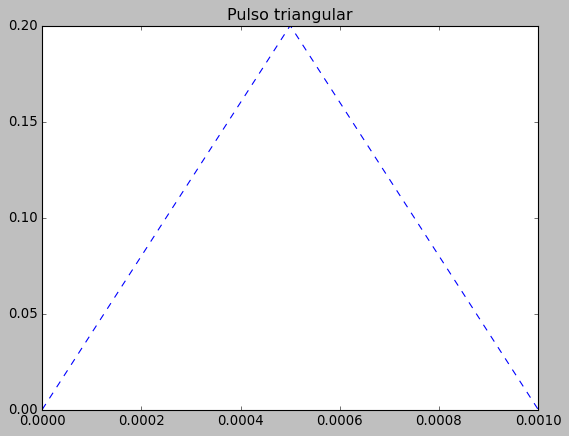

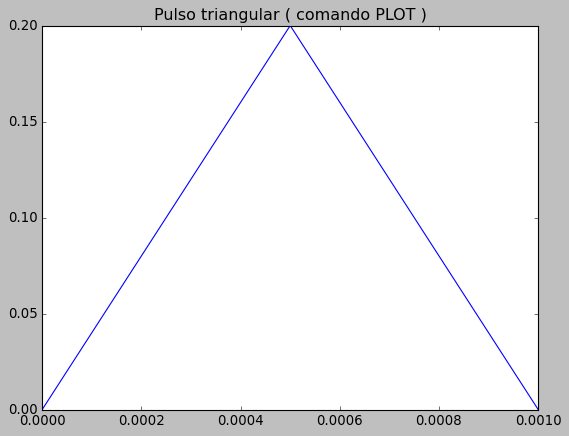

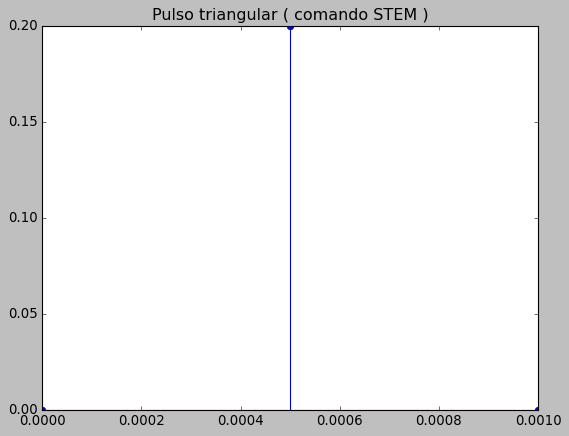

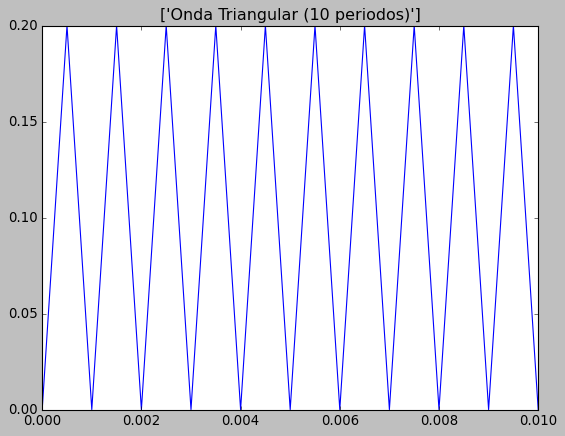

In [4]:
print(' Exercício 1')
print('  ')
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print('% Universidade Federal do Paraná - UFPR ')
print('% Lab 1 ')
print('% TE342 - Fundamentos de comunicação')
print('% Christofer Schwartz (alterações por Prof. Luis Lolis)')
print('% Representação de Sinais e Sistemas')
print('%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%')
print(' ')

print('O Matlab é um software interativo de alta performance')
print('voltado para o cálculo numérico, que integra:')
print('- Análise numérica')
print('- Cálculo com matrizes')
print('- Processamento de sinais')
print('- De gráficos num mesmo ambiente.')
print(' ')


print('--> No Matlab, o elemento básico de informação é uma matriz.')
print('--> O Matlab é DISCRETO.')
print(' ')

print('Exemplo 1: Geração de um pulso triangular.')
print(' ')
# input()

A = 0.2
f = 1000
T = 1 / f
tempo = arange(0, 1.0001 * T, T / 2)
y = zeros(3)
y[1] = A
plot(tempo, y, '--')
title('Pulso triangular')


figure()
plot(tempo, y)
title('Pulso triangular ( comando PLOT )')

figure()
stem(tempo, y, )
title('Pulso triangular ( comando STEM )')



A = 0.2
f = 1000
T = 1 / f
P = 10
tempo = arange(0, P * T * 1.001, T / 2)
y = zeros(3 + ((P - 1) * 2))
y[1::2] = A
figure()
plot(tempo, y)
title(['Onda Triangular (' + str(P) + ' periodos)'])
show()

# Exemplo 2

  
Exemplo 2: Geração de uma onda quadrada e análise espectral.
  
Analise Espectral:
Na análise espectral, deve-se observar que o espectro é calculado
através da função FFT (Fast Fourier Transform), 
que é uma implementação rápida da DFT (Discrete Fourier Transform).
 
A DFT, por sua vez, transforma um sinal discreto no domínio do 
tempo em sua representação discreta no domínio da frequência. 
 
Sem uma transformação entre sinal discreto no tempo e sinal 
discreto na frequência não seria possível computar a 
Transformada de Fourier com microprocessadores ou DSPs.
Apesar da DFT não ser a mesma coisa que a DTFT 
(Discrete Time Fourier Transform) - que é contínua no 
domínio da frequência - ambas têm pontos em comum:
 
- Periodicidade: tanto a DTFT quanto a DFT são periódicas 
com período que se estende de f = 0 até fs, onde fs é a 
frequência de amostragem. Tirando proveito dessa redundância, 
a DFT só é definida no intervalo 0 a fs automaticamente.
 
- Simetria: pode-se perceber que ex

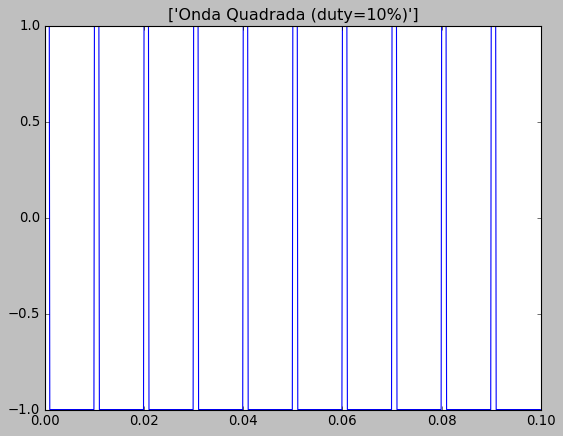

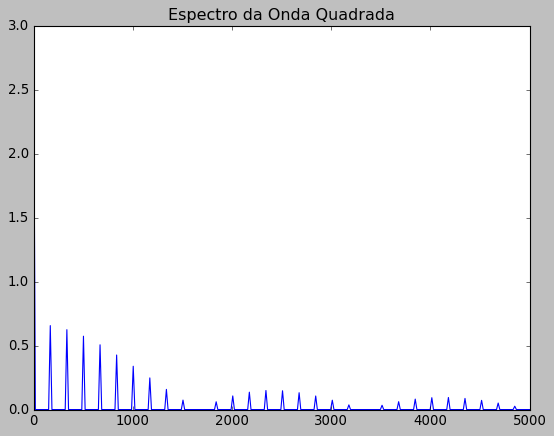

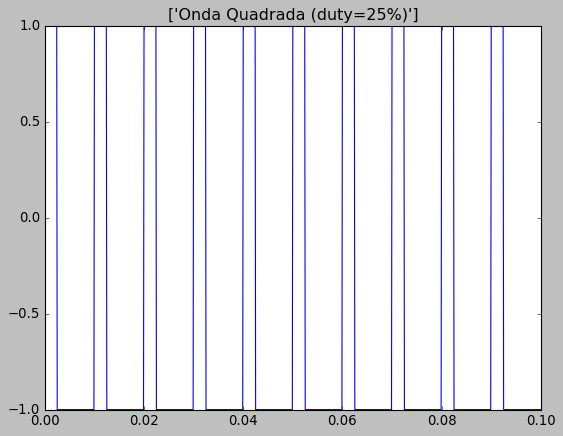

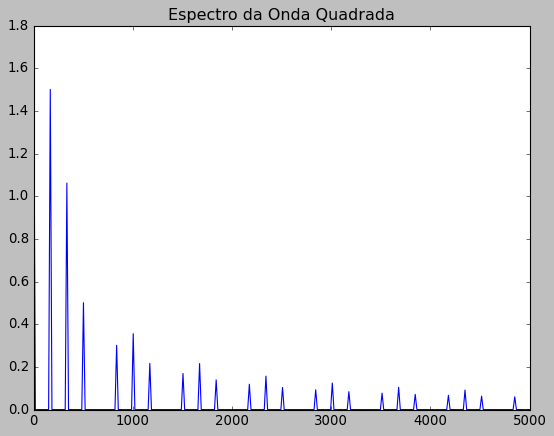

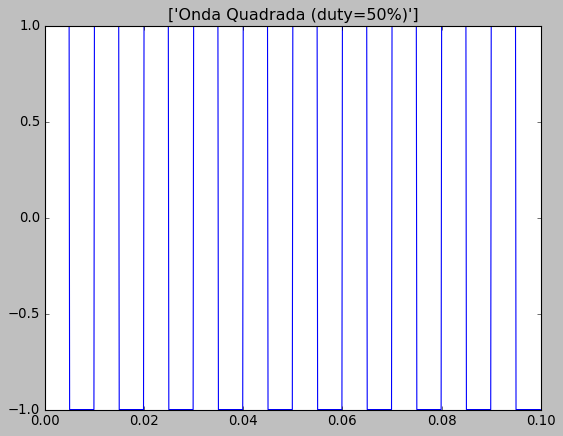

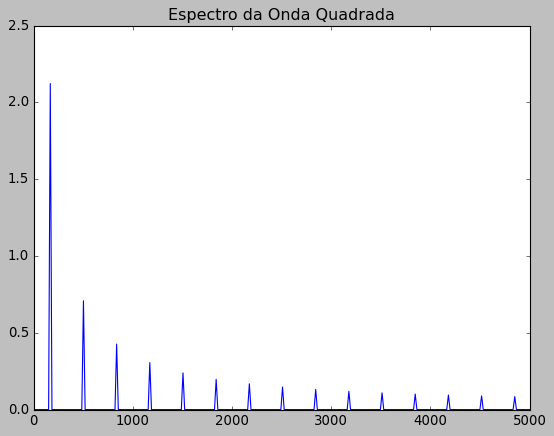

In [3]:
print('  ')
print('Exemplo 2: Geração de uma onda quadrada e análise espectral.')
print('  ')
print('Analise Espectral:')
print('Na análise espectral, deve-se observar que o espectro é calculado')
print('através da função FFT (Fast Fourier Transform), ')
print('que é uma implementação rápida da DFT (Discrete Fourier Transform).')
print(' ')
print('A DFT, por sua vez, transforma um sinal discreto no domínio do ')
print('tempo em sua representação discreta no domínio da frequência. ')
print(' ')


print('Sem uma transformação entre sinal discreto no tempo e sinal ')
print('discreto na frequência não seria possível computar a ')
print('Transformada de Fourier com microprocessadores ou DSPs.')
print('Apesar da DFT não ser a mesma coisa que a DTFT ')
print('(Discrete Time Fourier Transform) - que é contínua no ')
print('domínio da frequência - ambas têm pontos em comum:')
print(' ')


print('- Periodicidade: tanto a DTFT quanto a DFT são periódicas ')
print('com período que se estende de f = 0 até fs, onde fs é a ')
print('frequência de amostragem. Tirando proveito dessa redundância, ')
print('a DFT só é definida no intervalo 0 a fs automaticamente.')
print(' ')


print('- Simetria: pode-se perceber que existe uma simetria par em volta')
print('do ponto fs/2. A função fftshift do Matlab tira proveito disso')
print('e desloca o espectro, centralizando-o na frequência 0 ')
print('e mostrando o intervalo é fs/2 a fs/2.')
print(' ')


print(' PERGUNTA : O que acontece com o espectro de frequência se aumentarmos o valor To/T')
print(' PERGUNTA 2: Porque existem outros lóbulos alem do lóbulo principal?')

# 50x 10x 4x 2x
vetor_r = [10, 25, 50]  # Porcentagem de T para To
fc = 150  # Frequencia de corte do filtro
f0 = 100  # Frequencia fundamental da onda quadrada
fs = 100 * f0  # Frequencia de amostragem
periodos = 10
t = arange(0, 1 / f0 * periodos, 1 / fs)

for duty in vetor_r:
    y = signal.square(2 * np.pi * f0 * t, duty=duty / 100)
    figure()
    title(['Onda Quadrada (duty=' + str(duty) + '%)'])
    plot(t, y)
    N = 600
    yf = fft.fft(y)
    xf = linspace(0, fs / (2.0), N // 2)

    figure()
    plot(xf, 2.0 / N * np.abs(yf[:N // 2]))
    title('Espectro da Onda Quadrada')

# Exemplo 3

3)Filtragem de sinais:
 
   Um filtro passa-baixas é aplicado à um trêm de pulsos,
verificando-se o impacto no sinal no domínio do tempo e da
frequência.
 


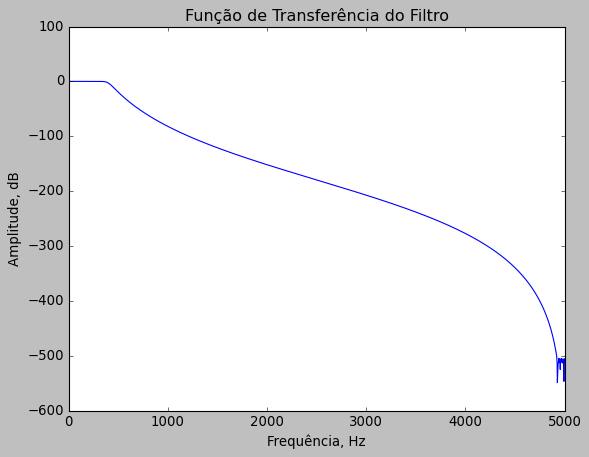

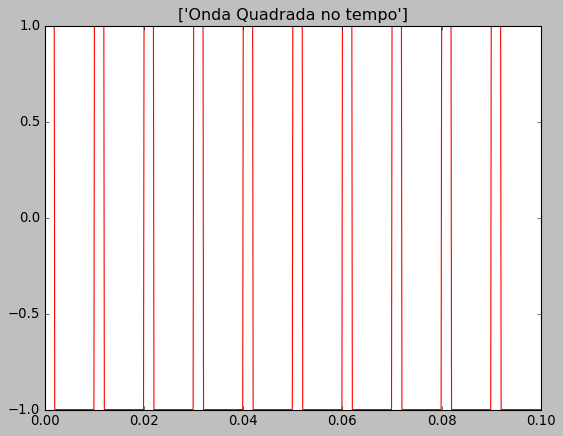

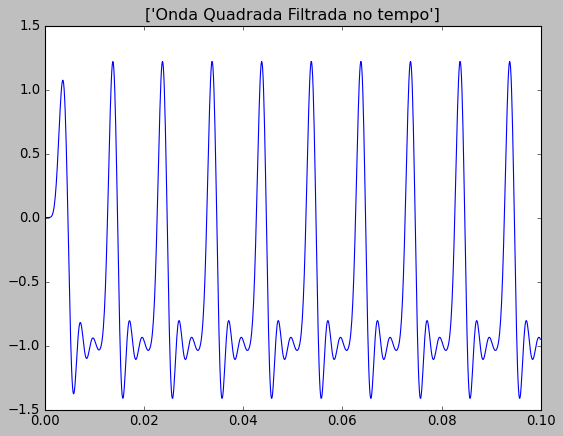

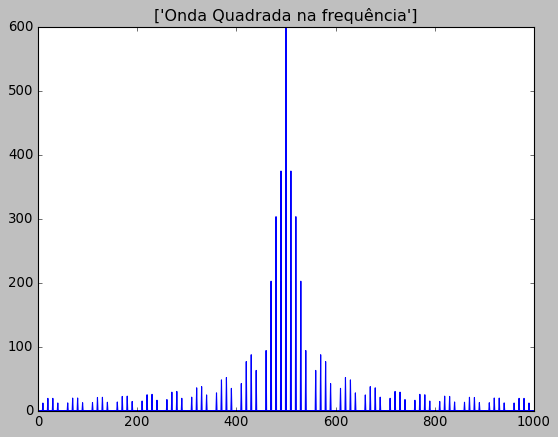

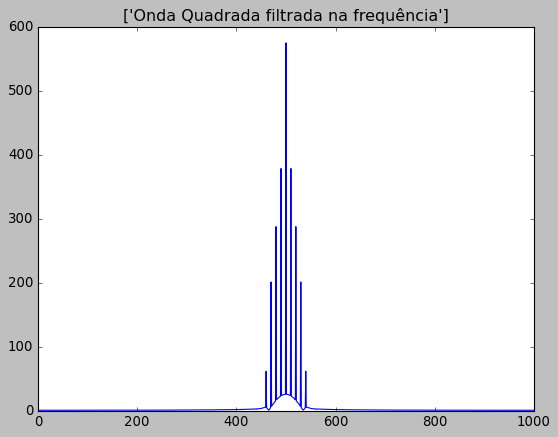

In [7]:
print('3)Filtragem de sinais:')
print(' ')
print('   Um filtro passa-baixas é aplicado à um trêm de pulsos,')
print('verificando-se o impacto no sinal no domínio do tempo e da')
print('frequência.')
print(' ')
freq_corte = [400]#, 1000, 250, 110]
for e in freq_corte:
    fc = e  # frequencia de corte do filtro
    f0 = 100  # frequencia fundamental da onda quadrada
    fs = 100 * f0  # frequencia de amostragem
    periodos = 10
    duty = 20
    t = arange(0, 1 / f0 * periodos, 1 / fs)
    y = signal.square(2 * pi * f0 * t, duty = duty/100)

    num, den = signal.butter(10, [2 * fc / fs], output='ba')
    F, H = signal.freqz(num, den, 2048, fs=fs)
    gain = 20 * log10(abs(H))

    figure()
    plot(F, gain)

    title('Função de Transferência do Filtro')
    xlabel('Frequência, Hz')
    ylabel('Amplitude, dB')

    y_f = lfilter(num, den, y)

    figure()
    plot(t, y, 'r')
    title(['Onda Quadrada no tempo'])

    figure()
    plot(t, y_f)
    title(['Onda Quadrada Filtrada no tempo'])


  
    Y = fft.fft(y)
    Y = fft.fftshift(Y)


    figure()
    plot(abs(Y))
    title(['Onda Quadrada na frequência'])


  
    Y_F = fft.fft(y_f)
    Y_F = fft.fftshift(Y_F)


    figure()
    plot(abs(Y_F))
    title(['Onda Quadrada filtrada na frequência'])



# Exemplo 4

 4) Análise espectral de uma onda senoidal:
 PERGUNTA 1: O que acontece com o espectro de frequência se aumentarmos o tempo de simulação?


Text(0.5, 1.0, "['Espectro da Onda Senoidal (Periodos=19.98,F=20 Hz)']")

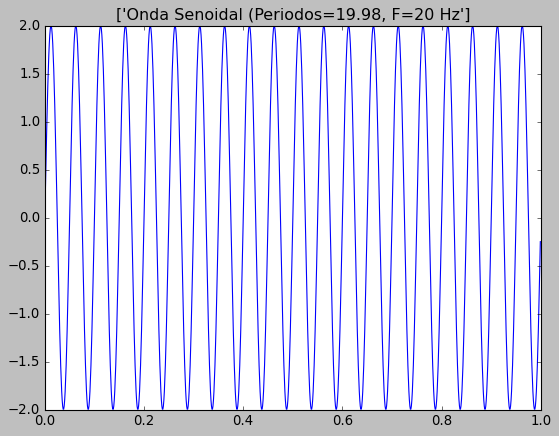

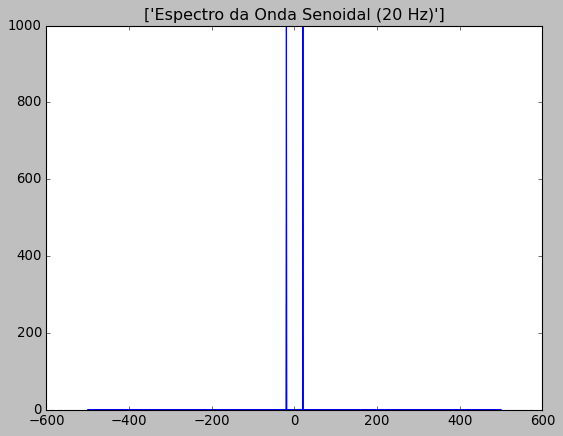

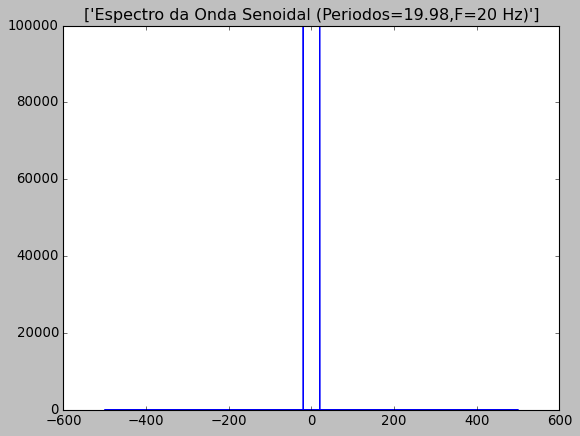

In [9]:
print(' 4) Análise espectral de uma onda senoidal:')



fs = 1000
f = 20
T = 1 / f
A = 2
tempo = arange(0, 1, 1 / fs)
y = A * sin(2 * pi * tempo * f)

figure
plot(tempo, y)
title(['Onda Senoidal (Periodos=' + str(max(tempo) / T) + ', F=' + str(f) + ' Hz'])




N = 600
yf = fft.fft(y)
yf = fft.fftshift(yf)

xf=linspace(-fs/2,fs/2,yf.size)

figure()
plot(xf,abs(yf))
title(['Espectro da Onda Senoidal (' + str(f) + ' Hz)'])


# input()

print(' PERGUNTA 1: O que acontece com o espectro de frequência se aumentarmos o tempo de simulação?')


# % -----para 100 periodos - -----

tempo_new = arange(0, 100, 1 / fs)
y_new = A * sin(2 * pi * tempo_new * f)


yf_new = fft.fft(y_new)
yf_new = fft.fftshift(yf_new)


xf_new=linspace(-fs/2,fs/2,yf_new.size)


figure()
plot(xf_new, abs(yf_new)) #, abs(yf))
title(['Espectro da Onda Senoidal (Periodos=' + str(max(tempo) / T) + ',F=' + str(f) + ' Hz)'])



# Exemplo 5

  
Integral de Convolução) 
A passagem de um sinal por um sistema Linear Invariante no Tempo é descrita pela integral
de convolução do sinal com a resposta ao impulso do sistema
No MATLAB essa operação é discreta e representa a soma de convolução através da função conv.
A função heaviside que é uma implementação da função degrau ajuda a
gerar as funções limitadas no tempo (triangulo, retangulo, exponencial deslocada)
A convolução no domínio do tempo representa um produto das transformadas de Fourier no domínio da Frequência.


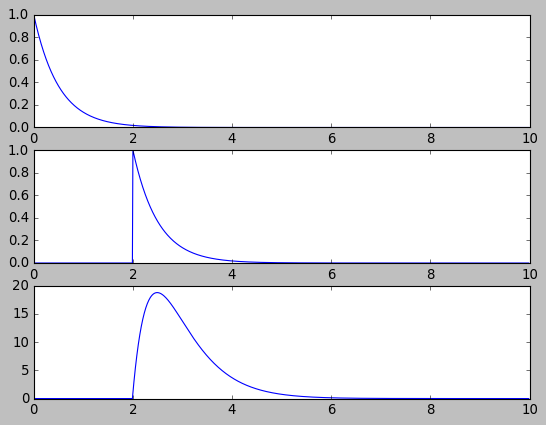

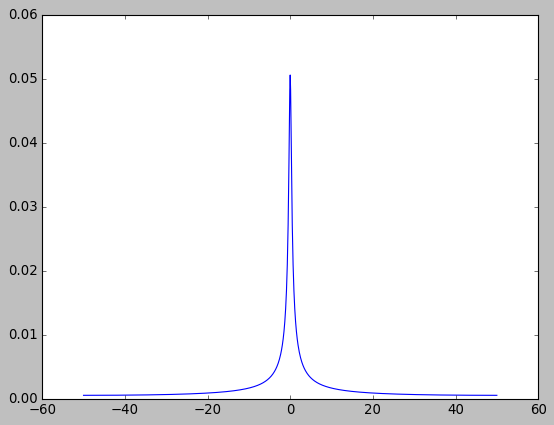

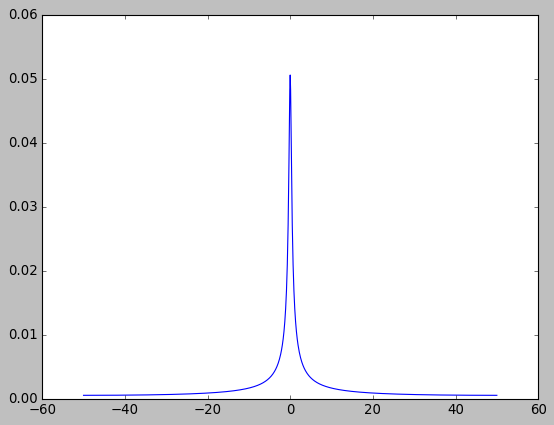

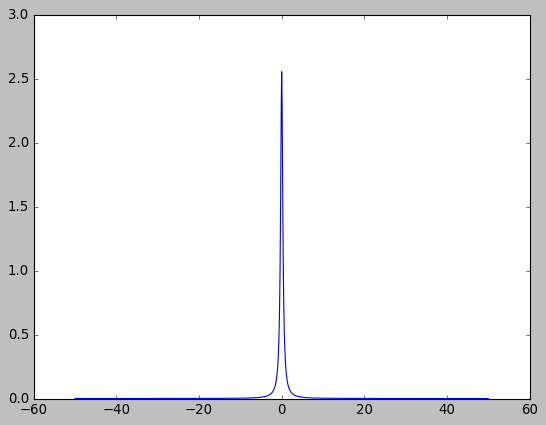

In [11]:
print('  ')
print('Integral de Convolução) ')

print('A passagem de um sinal por um sistema Linear Invariante no Tempo é descrita pela integral')
print('de convolução do sinal com a resposta ao impulso do sistema')
print('No MATLAB essa operação é discreta e representa a soma de convolução através da função conv.')
print('A função heaviside que é uma implementação da função degrau ajuda a')
print('gerar as funções limitadas no tempo (triangulo, retangulo, exponencial deslocada)')



T = 10
fs = 100

tempo = arange(0, T, 1 / fs)

if mod(len(tempo), 2) == 0:
    tempo = tempo[0: len(tempo) - 1]

    signal_1 = exp(-2. * tempo)
    signal_2 = exp(-2. * (tempo - 2)) * heaviside(tempo - 2, 1)

    output = np.convolve(signal_1, signal_2)
    output = output[0:len(tempo)]

    figure()
    subplot(3, 1, 1)
    plot(tempo, signal_1)
    subplot(3, 1, 2)
    plot(tempo, signal_2)
    subplot(3, 1, 3)
    plot(tempo, output)


    print('A convolução no domínio do tempo representa um produto das transformadas de Fourier no domínio da Frequência.')

    fft_signal_1 = fft.fftshift(fft.fft(signal_1)) / len(tempo)
    fft_signal_2 = fft.fftshift(fft.fft(signal_2)) / len(tempo)
    fft_output = fft.fftshift(fft.fft(output)) / len(tempo)
    
    freq = linspace(-fs / 2, fs / 2, len(tempo))

    figure()
    plot(freq, abs(fft_signal_1))
    figure()
    plot(freq, abs(fft_signal_2))
    figure()
    plot(freq, abs(fft_output))




# Roteiro para o LAB 1

Relatório:

1) Repetir o exemplo 1 (Pulso triangular), utilizando o comando STEM para traçar o gráfico, criar uma rotina que trace a onda variando o número de pontos. Utilize a FFT e plote um gráfico do espectro de frequência e escreva, com suas próprias palavras, o que este gráfico representa.
  
2) Variar os parâmetros da onda quadrada do exemplo 2 e relatar as mudanças no espectro da frequência. 
  
3) Alterando o exemplo 5, testar a convolução no tempo e frequência entre a onda quadrada de duração 3 e uma exponencial decrescente de taxa de decaimento 10

A entrega é um Notebook .ipynb com uma célula por exercício. Sempre comentar os resultados depois de cada figura apresentada e antes de cada alteração de parâmetro.
  